<a href="https://colab.research.google.com/github/ayurattihpramesti/TUGAS_PYTHON/blob/main/TUGAS%2011_AYU%20RATTIH%20PRAMESTI_1101194260.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd /content/drive/MyDrive/DATASET PYTHON/python lagi

/content/drive/MyDrive/DATASET PYTHON/python lagi


In [25]:
ls

'daun ayoeee.jpg'   gmb/   model_scene/


In [26]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [27]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("gmb")
data = []
labels = []

[INFO] loading images...


In [28]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  #preprocessing
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [29]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [30]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [31]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [32]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 128, 128, 3)
(146, 128, 128, 3)


In [33]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1440100   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [34]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [35]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 4s 253ms/step - loss: 2.0670 - accuracy: 0.2534 - val_loss: 1.5690 - val_accuracy: 0.2740
Epoch 2/25
14/14 [==============================] - 3s 244ms/step - loss: 1.5094 - accuracy: 0.3242 - val_loss: 1.4315 - val_accuracy: 0.4521
Epoch 3/25
14/14 [==============================] - 3s 243ms/step - loss: 1.3946 - accuracy: 0.4224 - val_loss: 1.3341 - val_accuracy: 0.4452
Epoch 4/25
14/14 [==============================] - 3s 244ms/step - loss: 1.1841 - accuracy: 0.5959 - val_loss: 1.2007 - val_accuracy: 0.5000
Epoch 5/25
14/14 [==============================] - 3s 248ms/step - loss: 1.0348 - accuracy: 0.6027 - val_loss: 1.1623 - val_accuracy: 0.5274
Epoch 6/25
14/14 [==============================] - 3s 246ms/step - loss: 0.8964 - accuracy: 0.6598 - val_loss: 0.9543 - val_accuracy: 0.6438
Epoch 7/25
14/14 [==============================] - 3s 245ms/step - loss: 0.8157 - accuracy: 0.6872 - val_loss: 0.9253 - val_accuracy: 0.6301
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


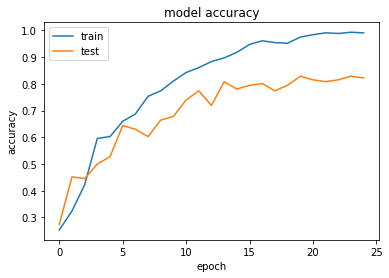

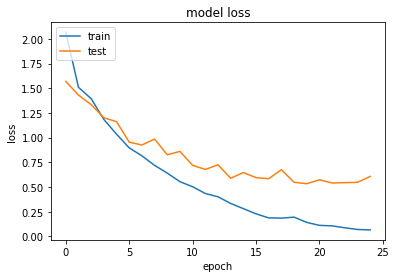

In [36]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [37]:
# evaluate the network
print("[INFO] evaluating network...") 
predictions = model1.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.89      0.73      0.80        33
      GMB_02       0.73      0.86      0.79        28
      GMB_03       0.97      1.00      0.99        34
      GMB_04       0.81      0.61      0.69        28
      GMB_05       0.70      0.91      0.79        23

    accuracy                           0.82       146
   macro avg       0.82      0.82      0.81       146
weighted avg       0.83      0.82      0.82       146



In [38]:
model1.save('model_scene')

INFO:tensorflow:Assets written to: model_scene/assets


In [39]:
import cv2
import matplotlib.pyplot as plt
image1='daun ayoeee.jpg'

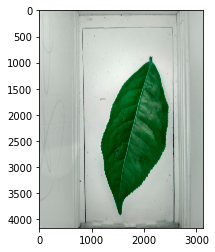

In [40]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [41]:
image_testing = Image.open('daun ayoeee.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [42]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [43]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.8312497e-05 9.9888366e-01 6.0771452e-04 5.6840406e-07 4.7968730e-04]]
['GMB_02']
